# 정규분포와 중심극한 정리
normal distribution 혹은 가우스 정규분포Gaussian normal distribution

In [2]:
µ = 0
std = 1
rv = sp.stats.norm(µ, std)

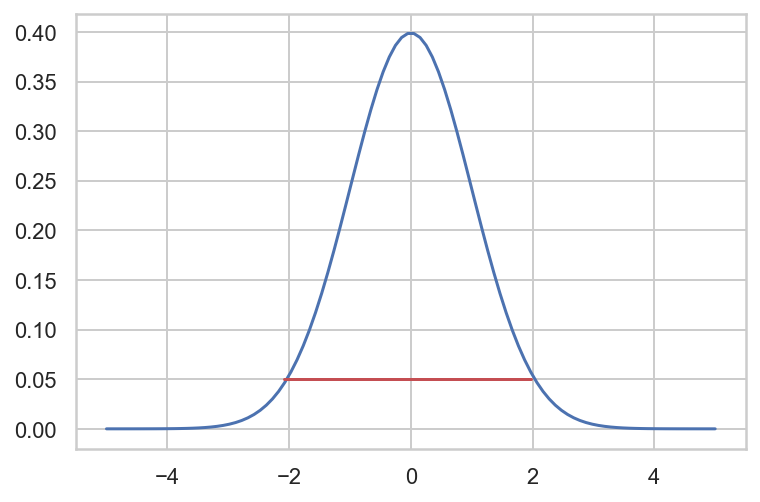

In [31]:
xx = plt.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.axhline(y = .05,xmin=0.31, xmax=0.68, color='r')
# plt.axhline(y=.5, xmin=0.2, xmax=0.75)
plt.show()
%matplotlib inline

In [32]:
x = rv.rvs(20)
x

array([-0.85676293, -1.70113799,  0.32062066, -0.66566697,  0.45158663,
       -0.64355712,  0.18527573,  0.50516293,  0.05375285,  0.74491254,
        2.28183203, -1.08450576, -0.07079316,  0.45599365, -1.73038082,
        0.18138696, -0.73539138,  0.92147726, -0.66300689, -1.67059573])

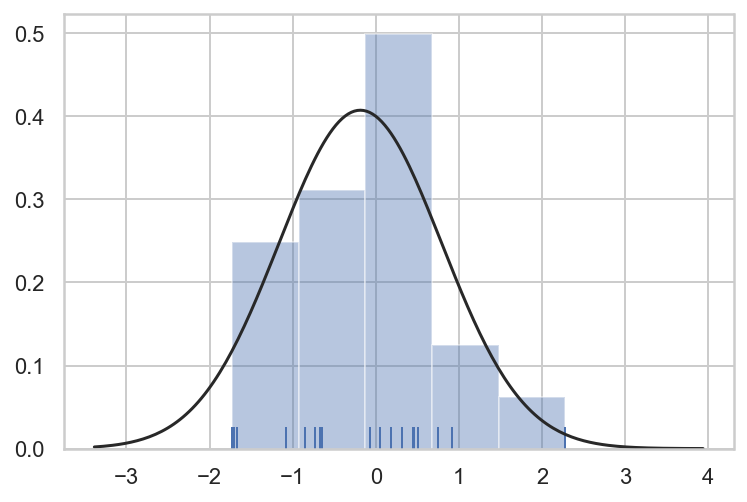

In [34]:
sns.distplot(x, rug=True, kde=False, fit=sp.stats.norm)

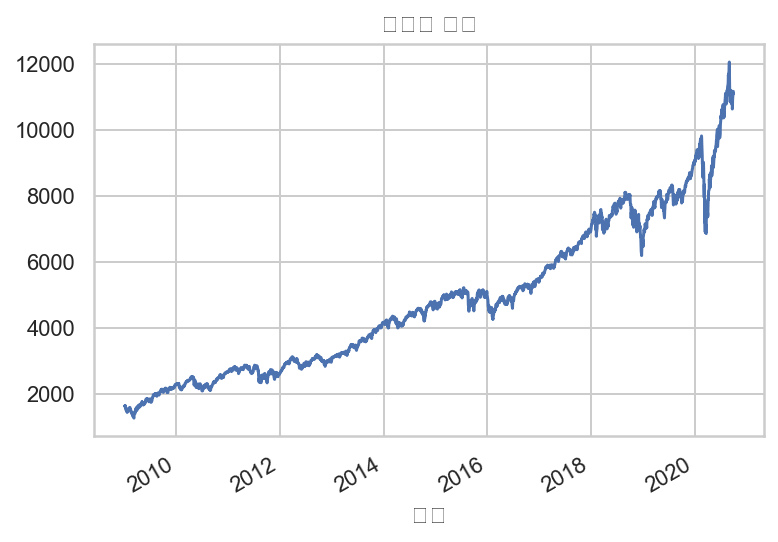

In [37]:
import pandas_datareader.data as web

symbol = "NASDAQCOM"
data = pd.DataFrame()
data[symbol] = web.DataReader(
    symbol, data_source="fred", start="2009-01-01", end="2020-9-30")[symbol]
data = data.dropna()
data.plot(legend=False)
plt.xlabel("날짜")
plt.title("나스닥 지수")
plt.show()

# 연습문제 8.4.3

In [38]:
µ = 0
std = 1
rv = sp.stats.norm(µ, std)

In [39]:
x = rv.rvs(10)
x_sorted = np.sort(x)

In [43]:
from scipy.stats.morestats import _calc_uniform_order_statistic_medians
position = _calc_uniform_order_statistic_medians(len(np.sort(x)))
position

array([0.06696701, 0.16232513, 0.25880367, 0.3552822 , 0.45176073,
       0.54823927, 0.6447178 , 0.74119633, 0.83767487, 0.93303299])

In [44]:
qf = rv.ppf(position)
qf

array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
        0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728])

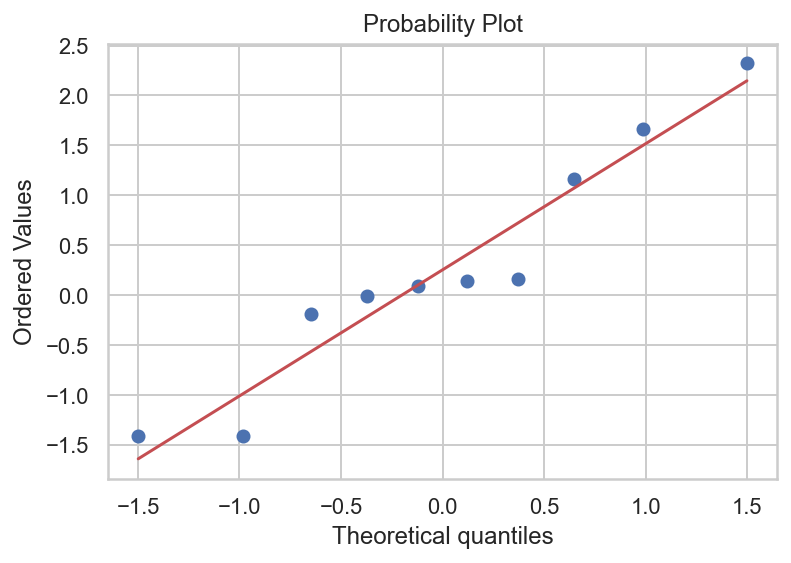

In [52]:
# plt.scatter(qf, np.sort(x))
sp.stats.probplot(x, plot=plt)
# plt.axis("equal")
plt.show()

------

# statistics distribution

# 통계랑 분포 스튜던트 T

In [3]:
M = 1000
N = 4
rv = sp.stats.norm()

In [7]:
x = rv.rvs((N, M), random_state=0)
x
x_t = np.mean(x)- / (np.std(x)/np.sqrt(N))

array([[ 1.76405235,  0.40015721,  0.97873798, ...,  0.0941923 ,
        -1.14761094, -0.35811408],
       [ 0.55596268,  0.89247389, -0.42231482, ...,  0.15843385,
        -1.14190142, -1.31097037],
       [-1.53292105, -1.71197016,  0.04613506, ..., -0.19240421,
        -1.21251574, -0.08059852],
       [ 1.59327362,  0.5687224 , -0.11448705, ..., -0.03057244,
         1.57708821, -0.8128021 ]])

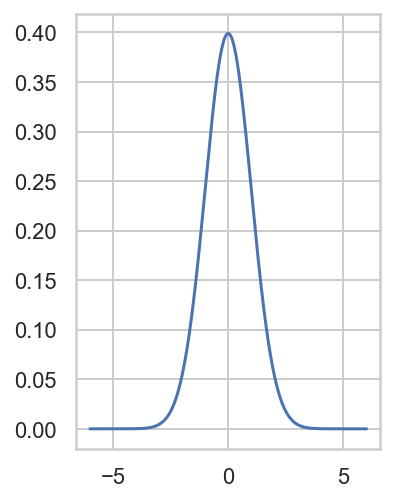

In [18]:
xx = np.linspace(-6, 6, 1000)
plt.subplot(1, 2 , 1)
plt.plot(xx, rv.pdf(xx))
plt.show()
%matplotlib inline

# 카이스퀘어

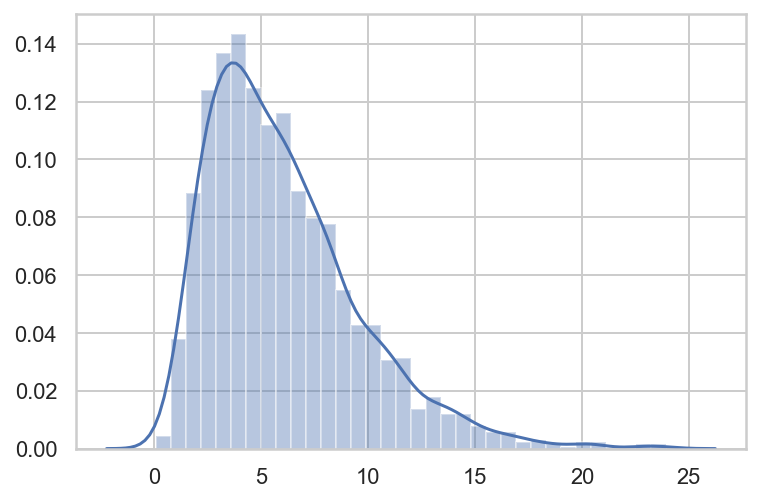

In [31]:
N = 6
M = 2000
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t)
plt.show()

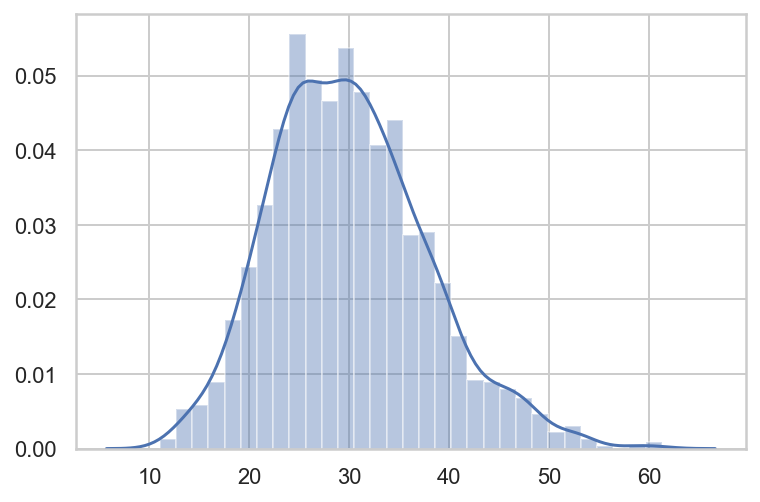

In [32]:
N = 30
M = 2000
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t)
plt.show()

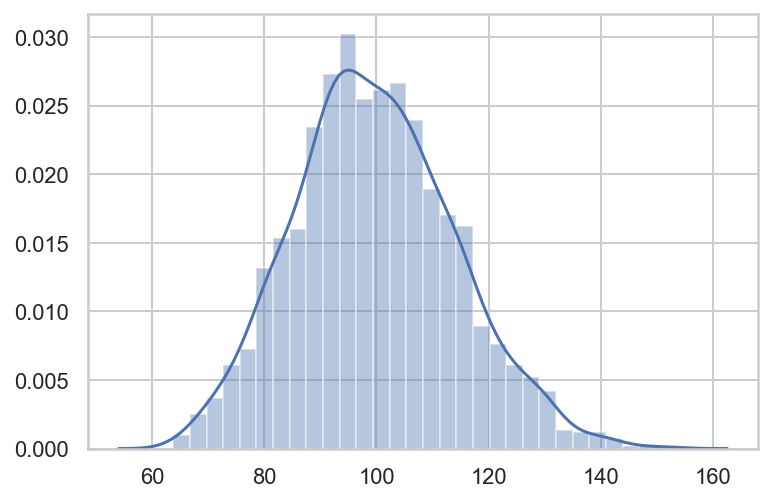

In [33]:
N = 100
M = 2000
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t)
plt.show()

# F 분포

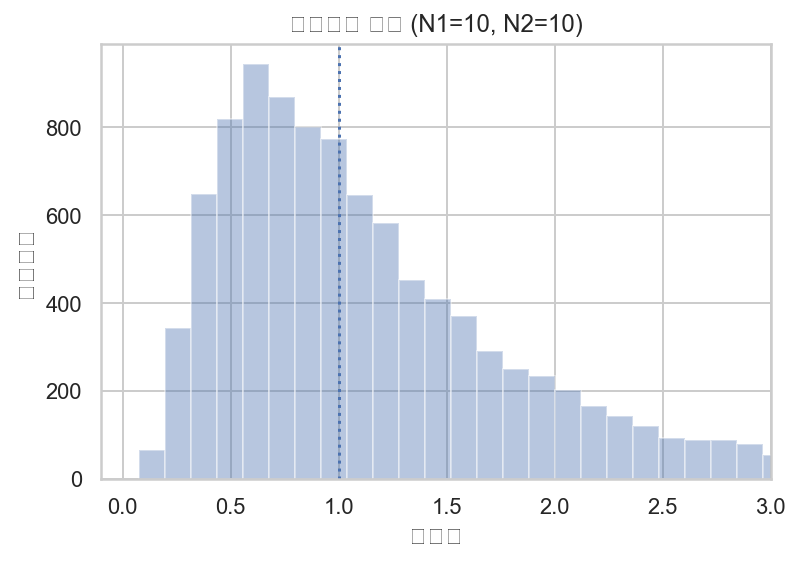

In [34]:

rv = sp.stats.norm()
M = 10000

N1 = 10
x1 = rv.rvs((N1, M))
t1 = (x1 ** 2).sum(axis=0)

N2 = 10
x2 = rv.rvs((N2, M))
t2 = (x2 ** 2).sum(axis=0)

t = t2 / t1
sns.distplot(t, bins=200, kde=False)
plt.axvline(1, ls=":");
plt.xlim(-0.1, 3)
plt.title("제곱합의 비율 (N1=10, N2=10)")
plt.xlabel("표본값")
plt.ylabel("표본개수")
plt.show()
